# Deployment Growell

## Import

In [ ]:
import pathlib
import os

In [ ]:
# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3909, done.
remote: Counting objects: 100% (3909/3909), done.
remote: Compressing objects: 100% (3016/3016), done.
remote: Total 3909 (delta 1129), reused 1996 (delta 840), pack-reused 0
Receiving objects: 100% (3909/3909), 49.65 MiB | 20.94 MiB/s, done.
Resolving deltas: 100% (1129/1129), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 16.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to bui

In [ ]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
import pathlib
import os
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Download Exported Model

In [ ]:
!gdown 1kG_XXhL2h-U1D0Se5CeOLYGleytRfVLk

/content
Downloading...
From: https://drive.google.com/uc?id=1kG_XXhL2h-U1D0Se5CeOLYGleytRfVLk
To: /content/fine_tuned_model.zip
100% 30.5M/30.5M [00:00<00:00, 88.9MB/s]


In [ ]:
!unzip fine_tuned_model.zip

Archive:  fine_tuned_model.zip
   creating: fine_tuned_model/
   creating: fine_tuned_model/checkpoint/
  inflating: fine_tuned_model/checkpoint/checkpoint  
  inflating: fine_tuned_model/checkpoint/ckpt-0.data-00000-of-00001  
  inflating: fine_tuned_model/checkpoint/ckpt-0.index  
  inflating: fine_tuned_model/ingredientsdetect.tflite  
  inflating: fine_tuned_model/pipeline.config  
   creating: fine_tuned_model/saved_model/
   creating: fine_tuned_model/saved_model/assets/
  inflating: fine_tuned_model/saved_model/fingerprint.pb  
  inflating: fine_tuned_model/saved_model/saved_model.pb  
   creating: fine_tuned_model/saved_model/variables/
  inflating: fine_tuned_model/saved_model/variables/variables.data-00000-of-00001  
  inflating: fine_tuned_model/saved_model/variables/variables.index  


In [ ]:
%mkdir /content/test/
%cd /content/test/
!curl -L "https://app.roboflow.com/ds/H7Zi2Fuy7z?key=hYHo1hjOfg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/test
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1459      0 --:--:-- --:--:-- --:--:--  1459
100 19.0M  100 19.0M    0     0  7749k      0  0:00:02  0:00:02 --:--:-- 13.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/food-ingredients.tfrecord  
 extracting: test/food-ingredients_label_map.pbtxt  
   creating: train/
 extracting: train/food-ingredients.tfrecord  
 extracting: train/food-ingredients_label_map.pbtxt  
   creating: valid/
 extracting: valid/food-ingredients.tfrecord  
 extracting: valid/food-ingredients_label_map.pbtxt  


## Load and Try Model

### Image Converter Function

In [ ]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

### Load Model

In [ ]:
# List checkpoints in a file and sort from oldest to newest
checkpoint_dir = '/content/fine_tuned_model/checkpoint' # Ganti path ini jadi lokasi file "ckpt-x.index"
filenames = list(pathlib.Path(checkpoint_dir).glob('*.index'))
filenames.sort()

# Get config and use the newest checkpoint
pipeline_config = '/content/fine_tuned_model/pipeline.config' # Ganti path ini jadi lokasi fine_tuned_model/pipeline.config
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
model_dir = str(filenames[-1]).replace('.index','')
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(model_dir))

# Inference function
def get_model_detection_function(model):

  @tf.function
  def detect_fn(image):
    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)
    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

### Load labels

In [ ]:
label_map_path = '/content/test/test/food-ingredients_label_map.pbtxt' # Ganti path ini jadi lokasi label_map.pbtxt
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

### Run Inference

In [ ]:
image_path = '/content/potato_carrot.jpg' # Ganti path ini jadi path gambar yang ingin diprediksi
image_np = load_image_into_numpy_array(image_path)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

### Get Results

In [ ]:
detections['detection_scores'][0].numpy()

array([0.9968489 , 0.993691  , 0.9920187 , 0.99185544, 0.26598856,
       0.10297474, 0.09303246, 0.08559939, 0.08372238, 0.08308534,
       0.07524065, 0.06660549, 0.06098917, 0.05838688, 0.05767216,
       0.05564394, 0.04746305, 0.04187719, 0.04120762, 0.04056634,
       0.03938336, 0.03934341, 0.03913741, 0.03777278, 0.03773654,
       0.03742183, 0.03696565, 0.03694108, 0.03665255, 0.03592148,
       0.03484453, 0.03479272, 0.03453377, 0.03404895, 0.0334906 ,
       0.03222552, 0.03189386, 0.0313981 , 0.03139086, 0.03122148,
       0.03112607, 0.03111463, 0.03055644, 0.03030954, 0.03014049,
       0.03010099, 0.02999312, 0.02976084, 0.0296705 , 0.02934462,
       0.02933499, 0.02929294, 0.0292349 , 0.02867289, 0.02858186,
       0.02837134, 0.02826047, 0.02805156, 0.02787621, 0.02767085,
       0.02676554, 0.02654438, 0.02651792, 0.02546282, 0.02538523,
       0.02511573, 0.02510246, 0.02470377, 0.0246399 , 0.02459613,
       0.02440794, 0.02416049, 0.02415286, 0.02390509, 0.02385

detection_scores contains the confidence score of all objects detected on the image

In [ ]:
category_index

{1: {'id': 1, 'name': 'bayam'},
 2: {'id': 2, 'name': 'brokoli'},
 3: {'id': 3, 'name': 'jagung'},
 4: {'id': 4, 'name': 'kentang'},
 5: {'id': 5, 'name': 'labusiam'},
 6: {'id': 6, 'name': 'telur'},
 7: {'id': 7, 'name': 'tomat'},
 8: {'id': 8, 'name': 'wortel'}}

In [ ]:
(detections['detection_classes'][0].numpy() + 1).astype(int)

array([6, 4, 6, 4, 4, 3, 2, 3, 2, 3, 1, 1, 2, 4, 4, 1, 7, 4, 6, 5, 4, 4,
       6, 7, 7, 8, 4, 7, 6, 6, 5, 4, 5, 4, 7, 2, 3, 1, 6, 6, 4, 4, 4, 2,
       4, 4, 6, 4, 6, 2, 3, 4, 6, 8, 4, 4, 6, 4, 6, 7, 6, 1, 7, 6, 4, 7,
       5, 4, 4, 7, 4, 8, 7, 4, 4, 6, 7, 6, 7, 4, 6, 3, 6, 7, 2, 6, 4, 6,
       4, 7, 6, 4, 6, 3, 5, 6, 4, 5, 4, 1])

detection_classes contains the labels of detected objects, it can be mapped into the label name using the category_index map

In [ ]:
detections['detection_boxes'][0].numpy()

array([[0.29519832, 0.07139018, 0.934221  , 0.75513554],
       [0.44461662, 0.12633291, 1.        , 0.90185666],
       [0.40220833, 0.6292956 , 0.7757244 , 0.86418736],
       [0.36273885, 0.10925624, 0.9467648 , 0.8259411 ],
       [0.31168452, 0.11015612, 0.8584143 , 0.5646566 ],
       [0.2568256 , 0.20300835, 0.9401952 , 0.9415322 ],
       [0.36273885, 0.10925624, 0.9467648 , 0.8259411 ],
       [0.00485   , 0.63574904, 0.27261937, 0.9163733 ],
       [0.5633335 , 0.14108658, 1.        , 1.        ],
       [0.00148697, 0.00368577, 0.28293955, 0.5693366 ],
       [0.01418649, 0.0607712 , 0.2653349 , 0.50502205],
       [0.00148697, 0.00368577, 0.28293955, 0.5693366 ],
       [0.40149474, 0.10933995, 1.        , 1.        ],
       [0.3255504 , 0.        , 0.9884763 , 0.56295794],
       [0.78825366, 0.589101  , 0.98022366, 1.        ],
       [0.04606354, 0.11084524, 0.7538658 , 0.83800673],
       [0.4382917 , 0.09960249, 0.92833996, 0.633541  ],
       [0.15539432, 0.        ,

detection_boxes contains the bounding box coordinates of detected objects

### Visualization

In [ ]:
label_id_offset = 1
image_np_with_detections = image_np.copy()

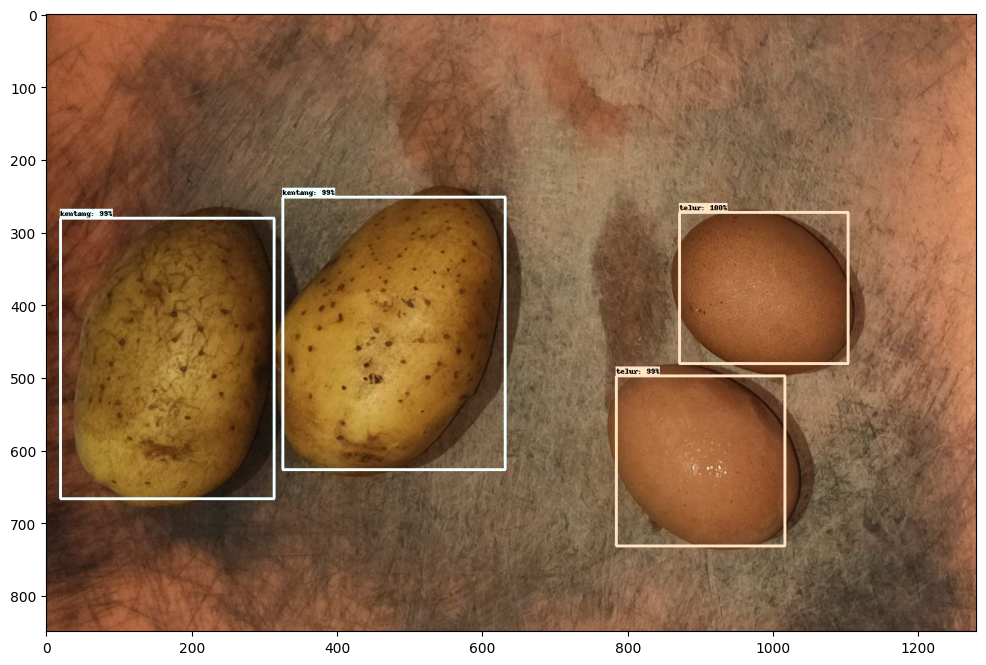

In [ ]:
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.9,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()